In [ ]:
import sys
sys.path.append('02_MNIST_classification')

from MNIST_class_helper import *
from MNIST_class_net import *

Training set size: 54000
Validation set size: 6000
Test set size: 10000
Epoch 1/10:
Train Loss: 0.3669, Train Acc: 88.66%
Val Loss: 0.1851, Val Acc: 94.35%

Epoch 2/10:
Train Loss: 0.1525, Train Acc: 95.31%
Val Loss: 0.1459, Val Acc: 95.37%

Epoch 3/10:
Train Loss: 0.1094, Train Acc: 96.61%
Val Loss: 0.1298, Val Acc: 96.00%

Epoch 4/10:
Train Loss: 0.0879, Train Acc: 97.25%
Val Loss: 0.1207, Val Acc: 96.65%

Epoch 5/10:
Train Loss: 0.0734, Train Acc: 97.62%
Val Loss: 0.1304, Val Acc: 96.18%

Epoch 6/10:
Train Loss: 0.0620, Train Acc: 98.02%
Val Loss: 0.1268, Val Acc: 96.30%

Epoch 7/10:
Train Loss: 0.0560, Train Acc: 98.13%
Val Loss: 0.1132, Val Acc: 96.83%

Epoch 8/10:
Train Loss: 0.0478, Train Acc: 98.46%
Val Loss: 0.1057, Val Acc: 97.12%

Epoch 9/10:
Train Loss: 0.0427, Train Acc: 98.64%
Val Loss: 0.1058, Val Acc: 97.13%

Epoch 10/10:
Train Loss: 0.0370, Train Acc: 98.71%
Val Loss: 0.1168, Val Acc: 97.07%


Final Test Accuracy: 97.34%


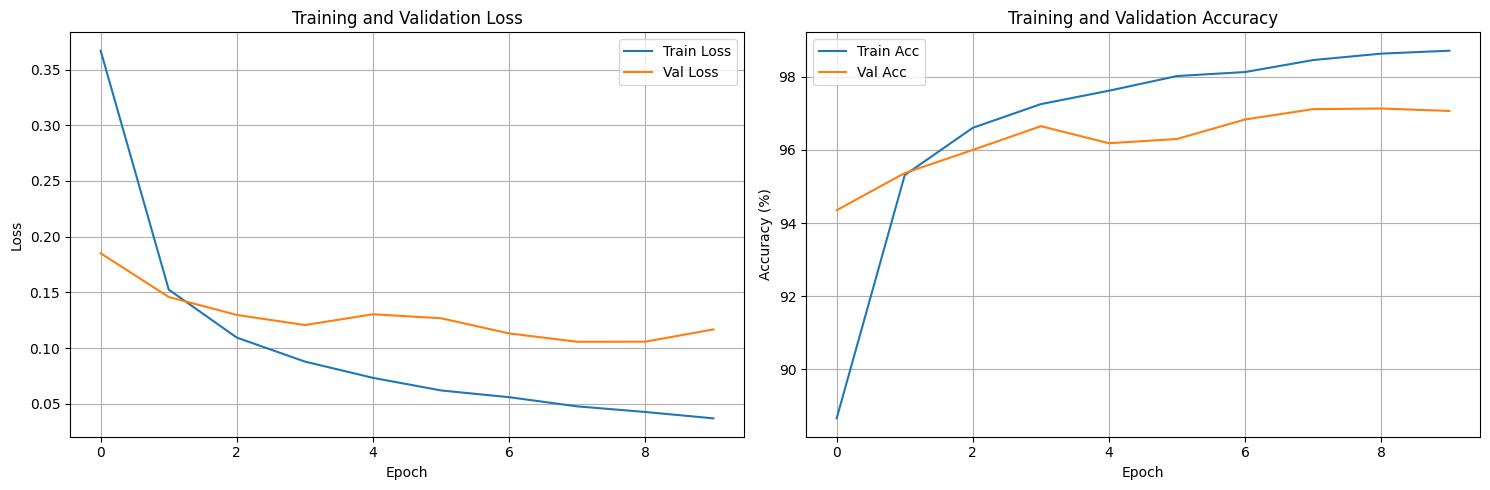

In [2]:
# Create data loaders with desired batch size
batch_size = 64
train_loader, val_loader, test_loader = create_data_loaders(batch_size=batch_size)

# Print dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Setup model and training parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
metrics = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=10,
    device=device
)

# Evaluate on test set
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"\nFinal Test Accuracy: {test_acc:.2f}%")

# Plot training history
plot_metrics(metrics)

In [3]:
# Use with CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inputs, activations, outputs = collect_activations(model, train_loader, device)

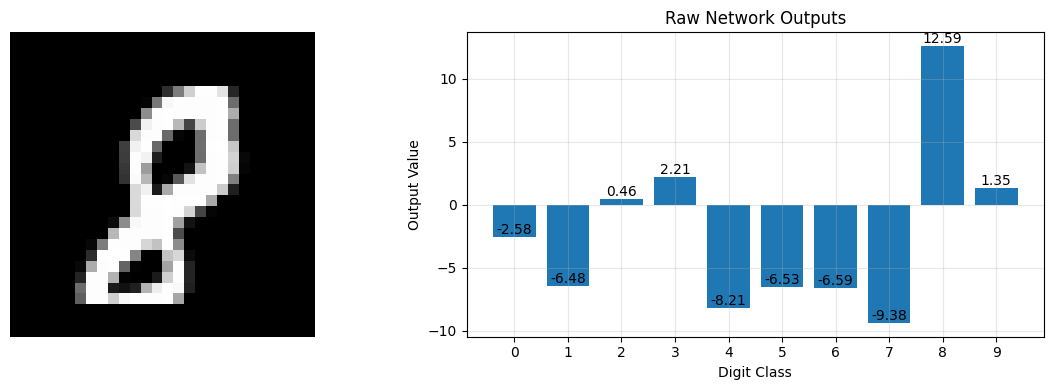

In [4]:
# Get random example from test set
new_input, new_activations, new_output, label = collect_single_example_activations(model, val_loader, device=device)
# Show raw outputs
visualize_result(image=new_input, output=new_output)

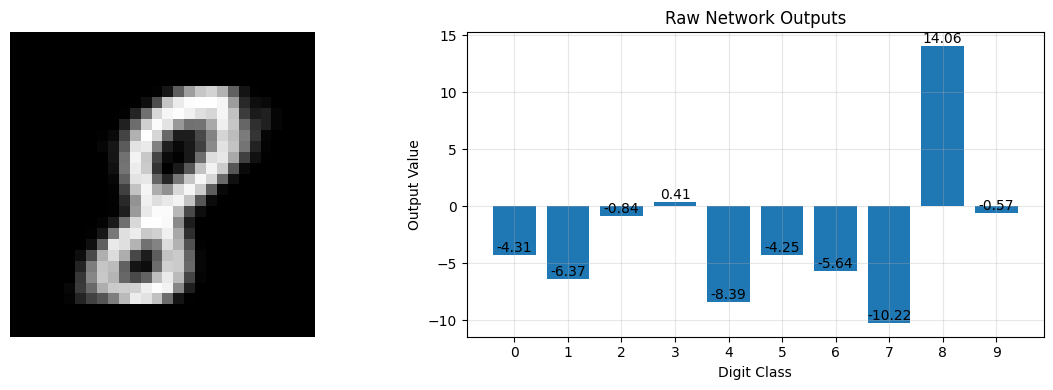

Input distance: 12.3115
Activation distance: 31.0133
Output distance: 4.5446
combined distance: 47.8694


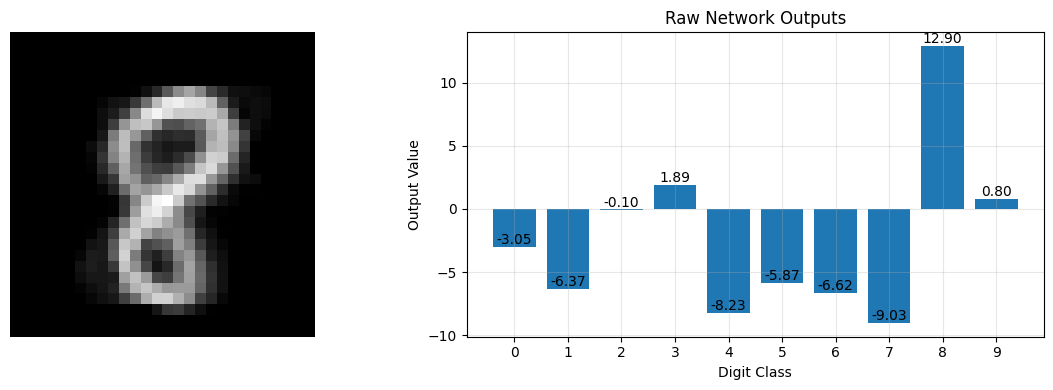

Input distance: 20.1039
Activation distance: 35.9556
Output distance: 1.2734
combined distance: 57.3330


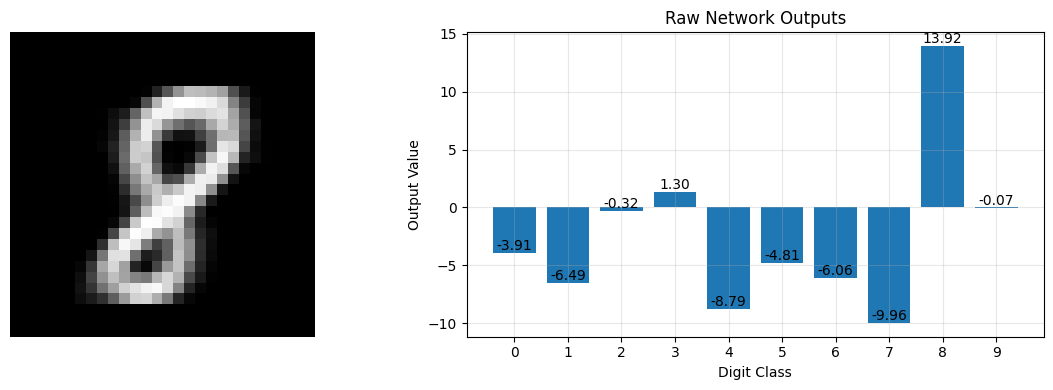

Input distance: 14.5101
Activation distance: 23.7400
Output distance: 3.3077
combined distance: 41.5578


In [5]:
# Finding KNN - Input based
indices, distances = knn_search(query=new_input, dataset=inputs, k=15, metric='euclidean')

# Finding KNN in inputs
blended_input, in_dist = blend_samples(dataset=inputs, indices=indices, distances=distances, reference=new_input)
blended_act, act_dist = blend_samples(dataset=activations, indices=indices, distances=distances, reference=new_activations)
blended_output, out_dist = blend_samples(dataset=outputs, indices=indices, distances=distances, reference=new_output)

visualize_result(image=blended_input, output=blended_output)
print(f"Input distance: {in_dist:.4f}")
print(f"Activation distance: {act_dist:.4f}")
print(f"Output distance: {out_dist:.4f}")
print(f"combined distance: {in_dist + act_dist + out_dist:.4f}")

#_______________________________
# Finding KNN - Output based
indices, distances = knn_search(query=new_output, dataset=outputs, k=15, metric='euclidean')

# Finding KNN in inputs
blended_input, in_dist = blend_samples(dataset=inputs, indices=indices, distances=distances, reference=new_input)
blended_act, act_dist = blend_samples(dataset=activations, indices=indices, distances=distances, reference=new_activations)
blended_output, out_dist = blend_samples(dataset=outputs, indices=indices, distances=distances, reference=new_output)

visualize_result(image=blended_input, output=blended_output)
print(f"Input distance: {in_dist:.4f}")
print(f"Activation distance: {act_dist:.4f}")
print(f"Output distance: {out_dist:.4f}")
print(f"combined distance: {in_dist + act_dist + out_dist:.4f}")


#_______________________________
# Finding KNN - Activation based
# Find top 10 highest activating neurons in specific range
low_neuron = 0
n_neurons = 128
#high_indices, high_means = find_activation_extremes(activations=activations, activation_range=(0, len(new_activations)), n_neurons=n_neurons, get_highest=True)

# Finding KNN
indices, distances = knn_search(query=new_activations, dataset=activations, k=15, metric='euclidean')
#indices, distances = knn_search(query=new_activations[high_indices[low_neuron:n_neurons]], dataset=activations[:,high_indices[low_neuron:n_neurons]], k=15, metric='euclidean')

# Finding KNN in inputs
blended_input, in_dist = blend_samples(dataset=inputs, indices=indices, distances=distances, reference=new_input)
blended_act, act_dist = blend_samples(dataset=activations, indices=indices, distances=distances, reference=new_activations)
blended_output, out_dist = blend_samples(dataset=outputs, indices=indices, distances=distances, reference=new_output)

visualize_result(image=blended_input, output=blended_output)
print(f"Input distance: {in_dist:.4f}")
print(f"Activation distance: {act_dist:.4f}")
print(f"Output distance: {out_dist:.4f}")
print(f"combined distance: {in_dist + act_dist + out_dist:.4f}")

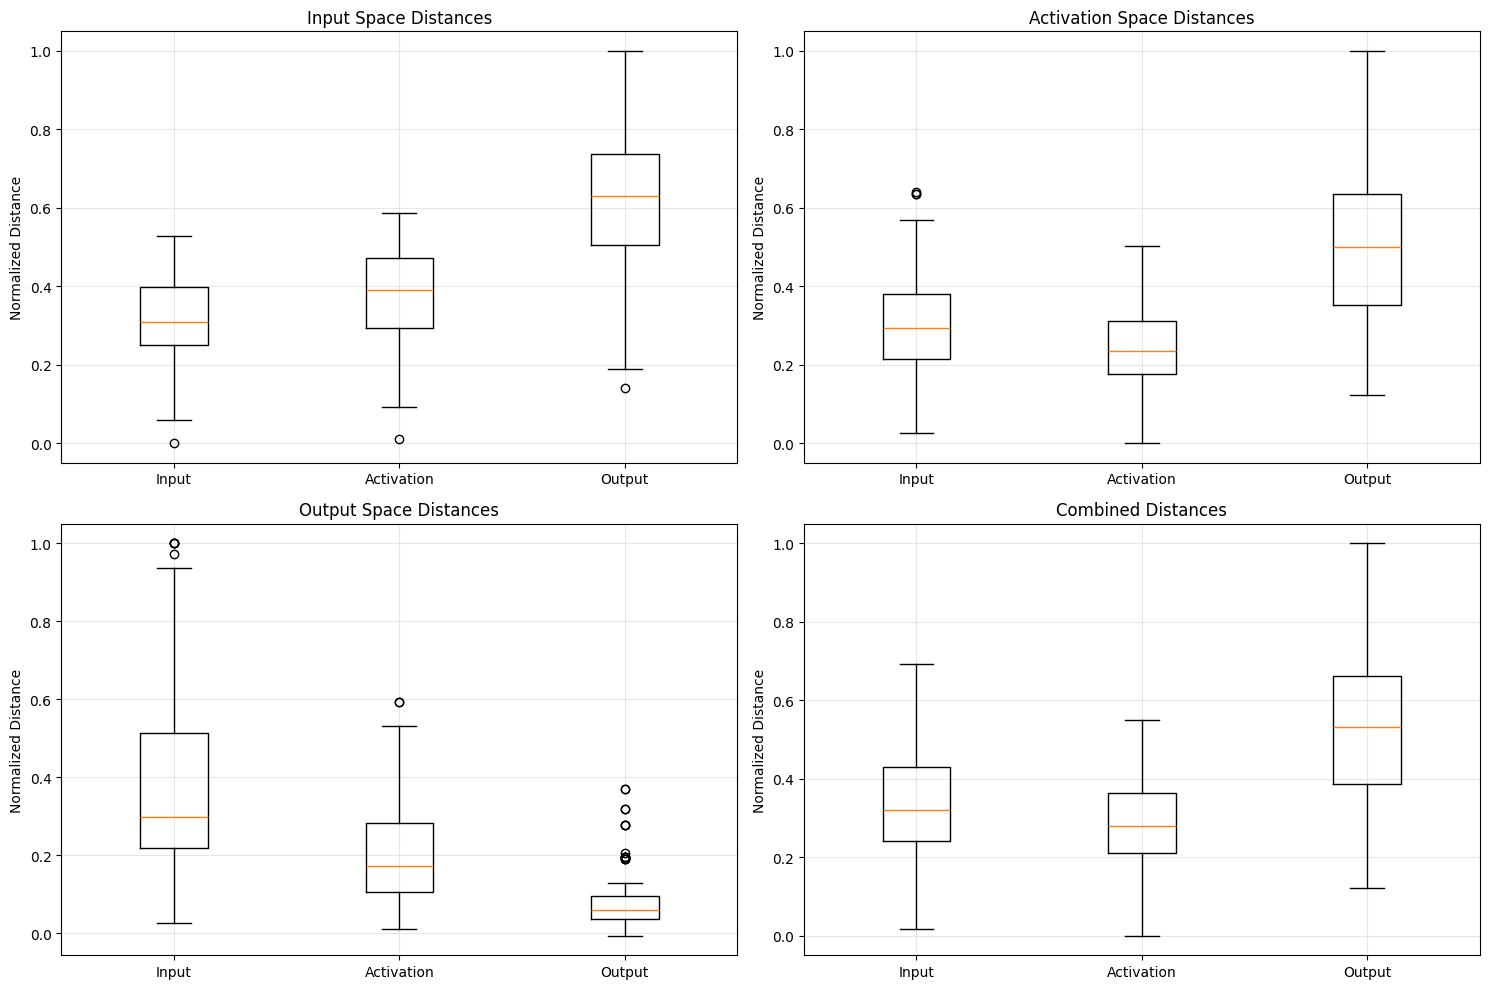


Mean distances for each approach:

input_based:
Input distance: 0.3161
Activation distance: 0.3105
Output distance: 0.3719
Combined distance: 0.3429

activation_based:
Input distance: 0.3793
Activation distance: 0.2497
Output distance: 0.2069
Combined distance: 0.2971

output_based:
Input distance: 0.6239
Activation distance: 0.5139
Output distance: 0.0766
Combined distance: 0.5369


In [6]:
# Analyze with specific activation range
results_full = analyze_multiple_samples(
    model=model,
    loader=val_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=150,
    k=15,
    device=device,
    seed=42,
    activation_range=(0, len(new_activations))
)

# Plot results
plot_distance_distributions(results_full)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_full[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_full[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_full[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_full[approach]['combined_dist']):.4f}")

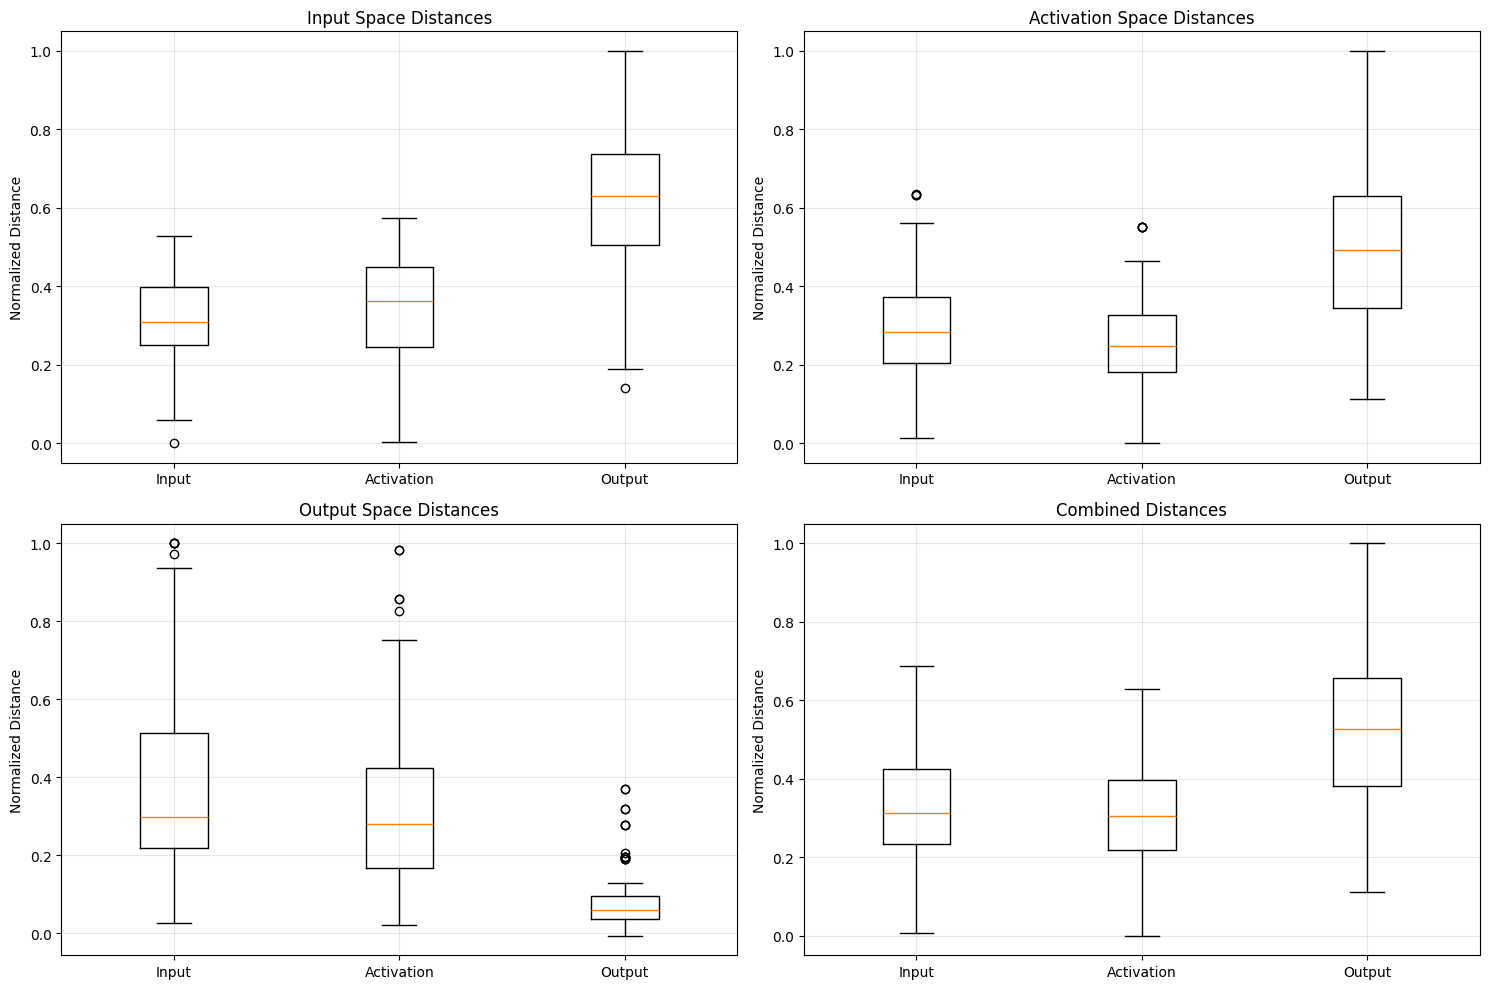


Mean distances for each approach:

input_based:
Input distance: 0.3161
Activation distance: 0.3019
Output distance: 0.3719
Combined distance: 0.3356

activation_based:
Input distance: 0.3570
Activation distance: 0.2630
Output distance: 0.3166
Combined distance: 0.3120

output_based:
Input distance: 0.6239
Activation distance: 0.5078
Output distance: 0.0766
Combined distance: 0.5318


In [7]:
# Analyze with specific activation range
results_first = analyze_multiple_samples(
    model=model,
    loader=val_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=150,
    k=15,
    device=device,
    seed=42,
    activation_range=(0, 64)
)

# Plot results
plot_distance_distributions(results_first)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_first[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_first[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_first[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_first[approach]['combined_dist']):.4f}")

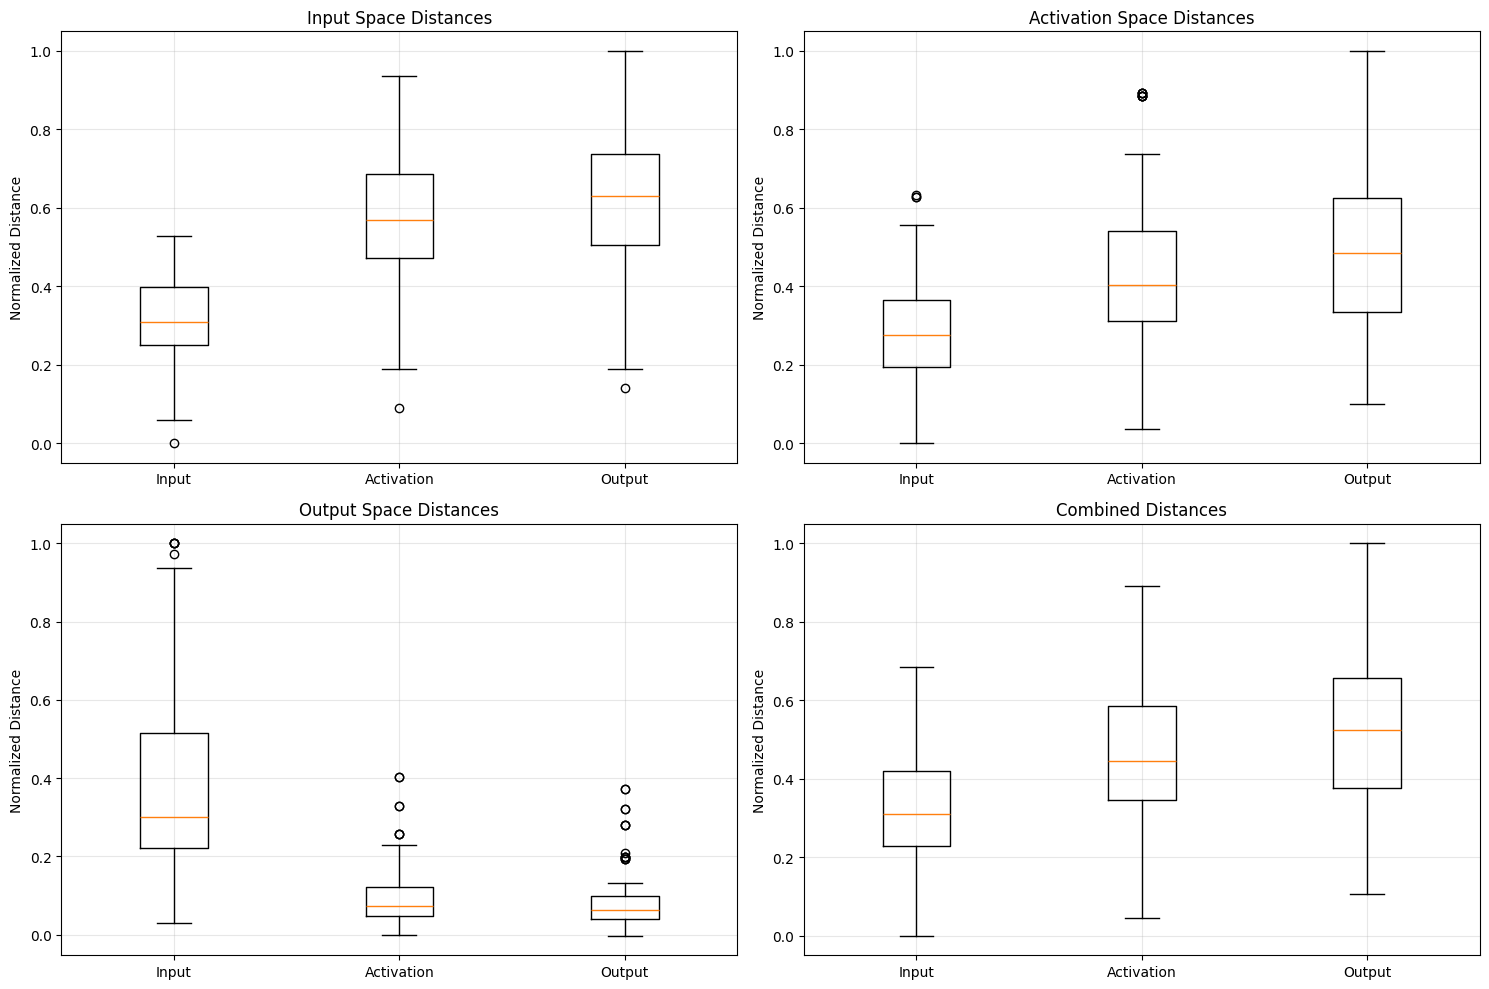


Mean distances for each approach:

input_based:
Input distance: 0.3161
Activation distance: 0.2927
Output distance: 0.3744
Combined distance: 0.3313

activation_based:
Input distance: 0.5782
Activation distance: 0.4340
Output distance: 0.0913
Combined distance: 0.4697

output_based:
Input distance: 0.6239
Activation distance: 0.5013
Output distance: 0.0802
Combined distance: 0.5288


In [8]:
# Analyze with specific activation range
results_last = analyze_multiple_samples(
    model=model,
    loader=val_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=150,
    k=15,
    device=device,
    seed=42,
    activation_range=(len(new_activations)-64, len(new_activations))
)

# Plot results
plot_distance_distributions(results_last)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_last[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_last[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_last[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_last[approach]['combined_dist']):.4f}")

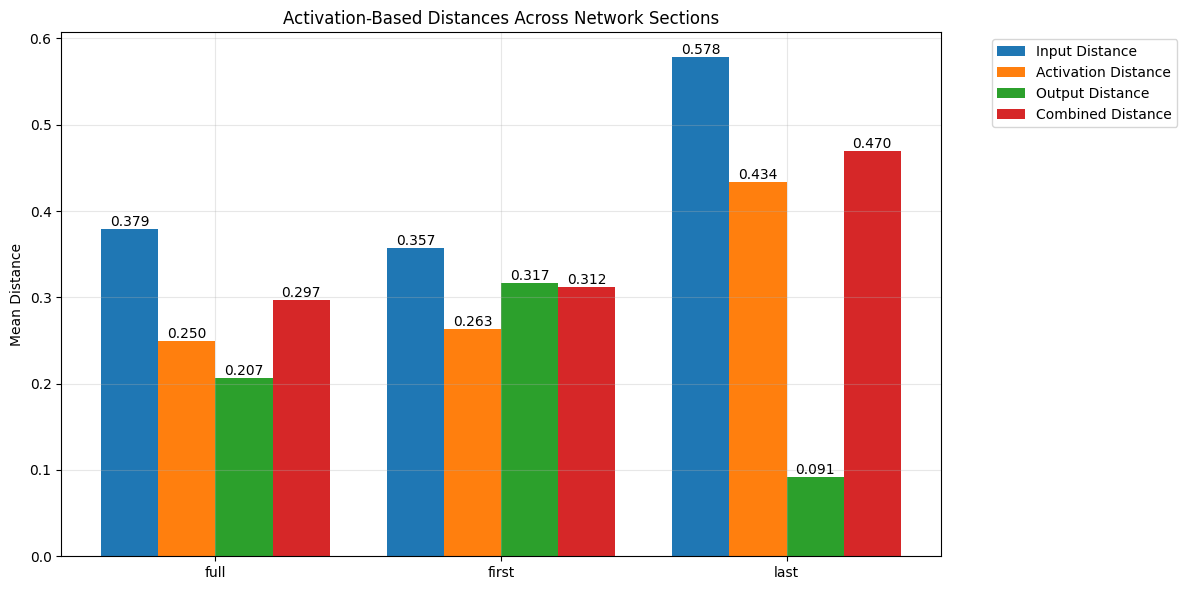


Detailed distances (activation-based approach):

Input Distance:
full: 0.379
first: 0.357
last: 0.578

Activation Distance:
full: 0.250
first: 0.263
last: 0.434

Output Distance:
full: 0.207
first: 0.317
last: 0.091

Combined Distance:
full: 0.297
first: 0.312
last: 0.470


In [9]:
compare_activation_distances(
    results_full=results_full,          # Results for convolution layers
    results_first=results_first, # Results for embedding layer
    results_last=results_last,  # Results for classification layer          # Results for full network
    normalize=False                      # Set to False for raw distances
)

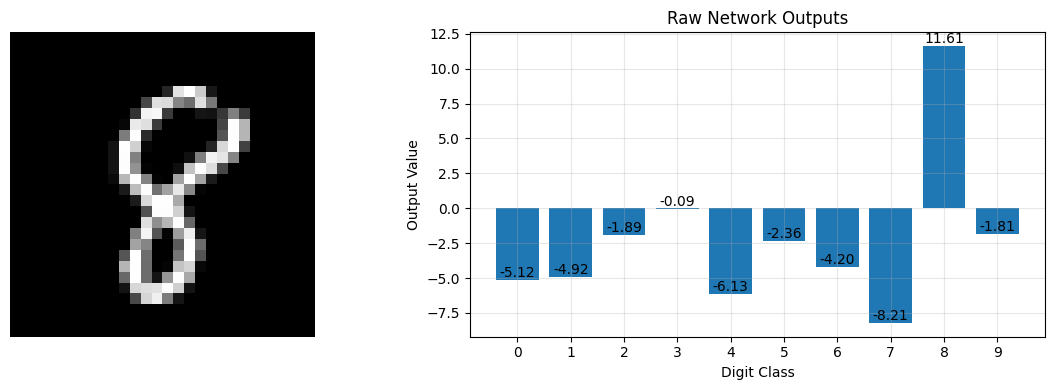

In [10]:
# Get random example from test set
new_input, new_activations, new_output, label = collect_single_example_activations(model, val_loader, device=device)
# Show raw outputs
visualize_result(image=new_input, output=new_output)

In [11]:
# Create and train VAE model with improved parameters
latent_dim = 50
vae_reduced_activations, vae_model = create_vae_model(
    activations=activations,
    latent_dim=latent_dim,
    batch_size=128,
    num_epochs=150,
    learning_rate=1e-3,
    beta=0.5  # Reduce KL weight to focus more on reconstruction
)
# Later, transform new activations
vae_reduced = transform_new_activations_vae(
    new_activations=new_activations,
    vae_model=vae_model
)

c:\Users\Lukas\miniconda3\envs\ml_train\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/150], Loss: 3.5216
Epoch [20/150], Loss: 3.2470
Epoch [30/150], Loss: 3.0966
Epoch [40/150], Loss: 3.0323
Epoch [50/150], Loss: 2.9795
Epoch [60/150], Loss: 2.9268
Epoch [70/150], Loss: 2.9012
Epoch [80/150], Loss: 2.8553
Epoch [90/150], Loss: 2.8390
Epoch [100/150], Loss: 2.8068
Epoch [110/150], Loss: 2.7795
Epoch [120/150], Loss: 2.7610
Epoch [130/150], Loss: 2.7511
Epoch [140/150], Loss: 2.7324
Epoch [150/150], Loss: 2.7079


Explained variance with 50 components: 0.9687


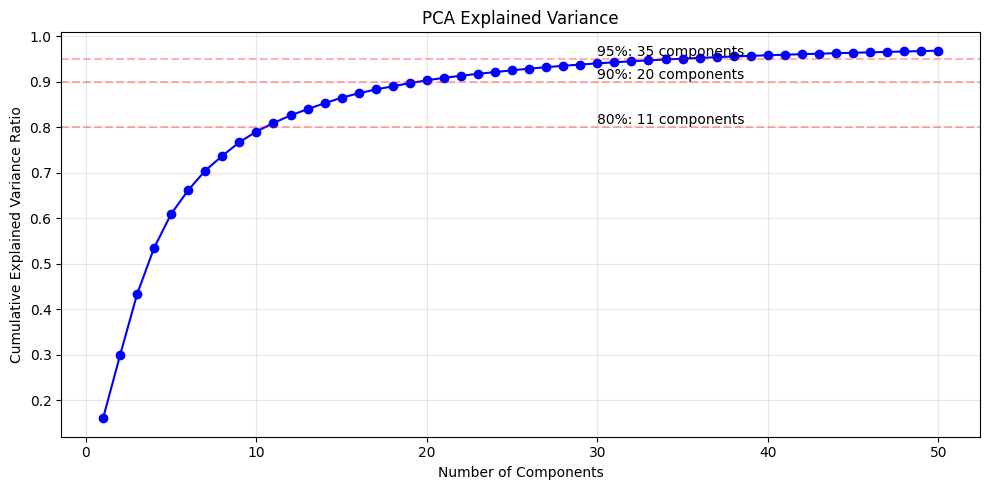

In [12]:
# Create and fit PCA model
n_components = 50  # Choose number of components
pca_reduced_activations, pca_model, scaler = create_pca_model(
    activations=activations,
    n_components=n_components,
    standardize=False
)

# Plot explained variance
plot_cumulative_variance(pca_model)

# Later, transform new activations
pca_reduced = transform_new_activations(
    new_activations=new_activations,
    pca_model=pca_model,
    scaler=scaler
)

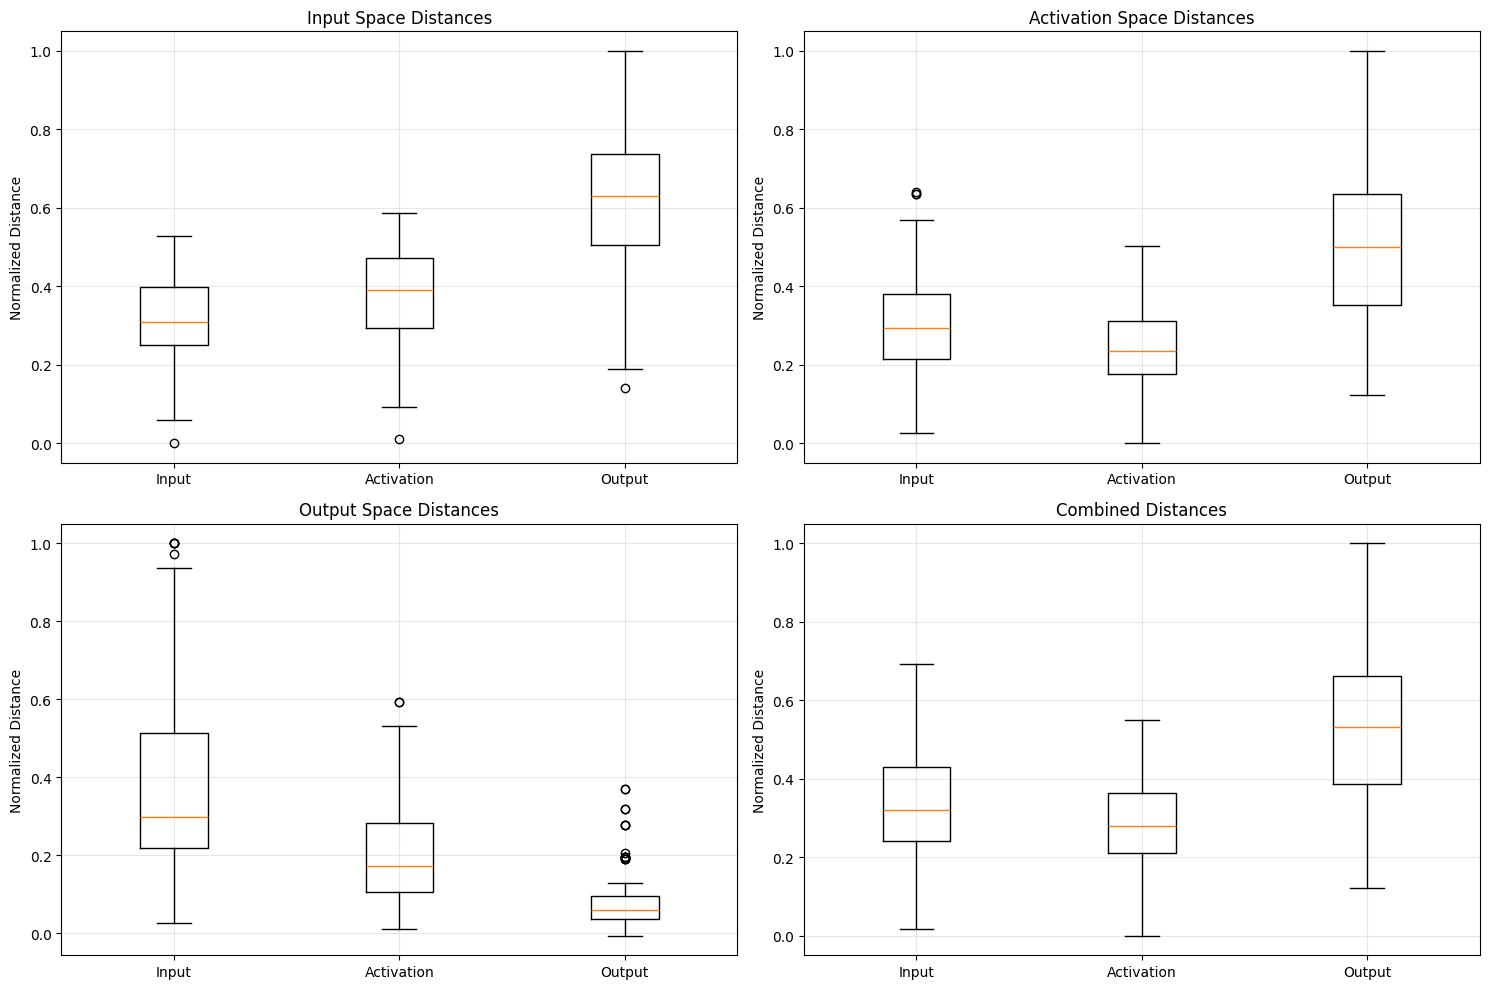


Mean distances for each approach:

input_based:
Input distance: 0.3161
Activation distance: 0.3105
Output distance: 0.3719
Combined distance: 0.3429

activation_based:
Input distance: 0.3793
Activation distance: 0.2497
Output distance: 0.2069
Combined distance: 0.2971

output_based:
Input distance: 0.6239
Activation distance: 0.5139
Output distance: 0.0766
Combined distance: 0.5369


In [ ]:
# No dimensionality reduction:
results_normal = analyze_multiple_samples(
    model=model,
    loader=val_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=150,
    k=15,
    device=device,
    seed=42,
    activation_range=None  # Use full range for PCA
)

# Plot results
plot_distance_distributions(results_normal)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_normal[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_normal[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_normal[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_normal[approach]['combined_dist']):.4f}")

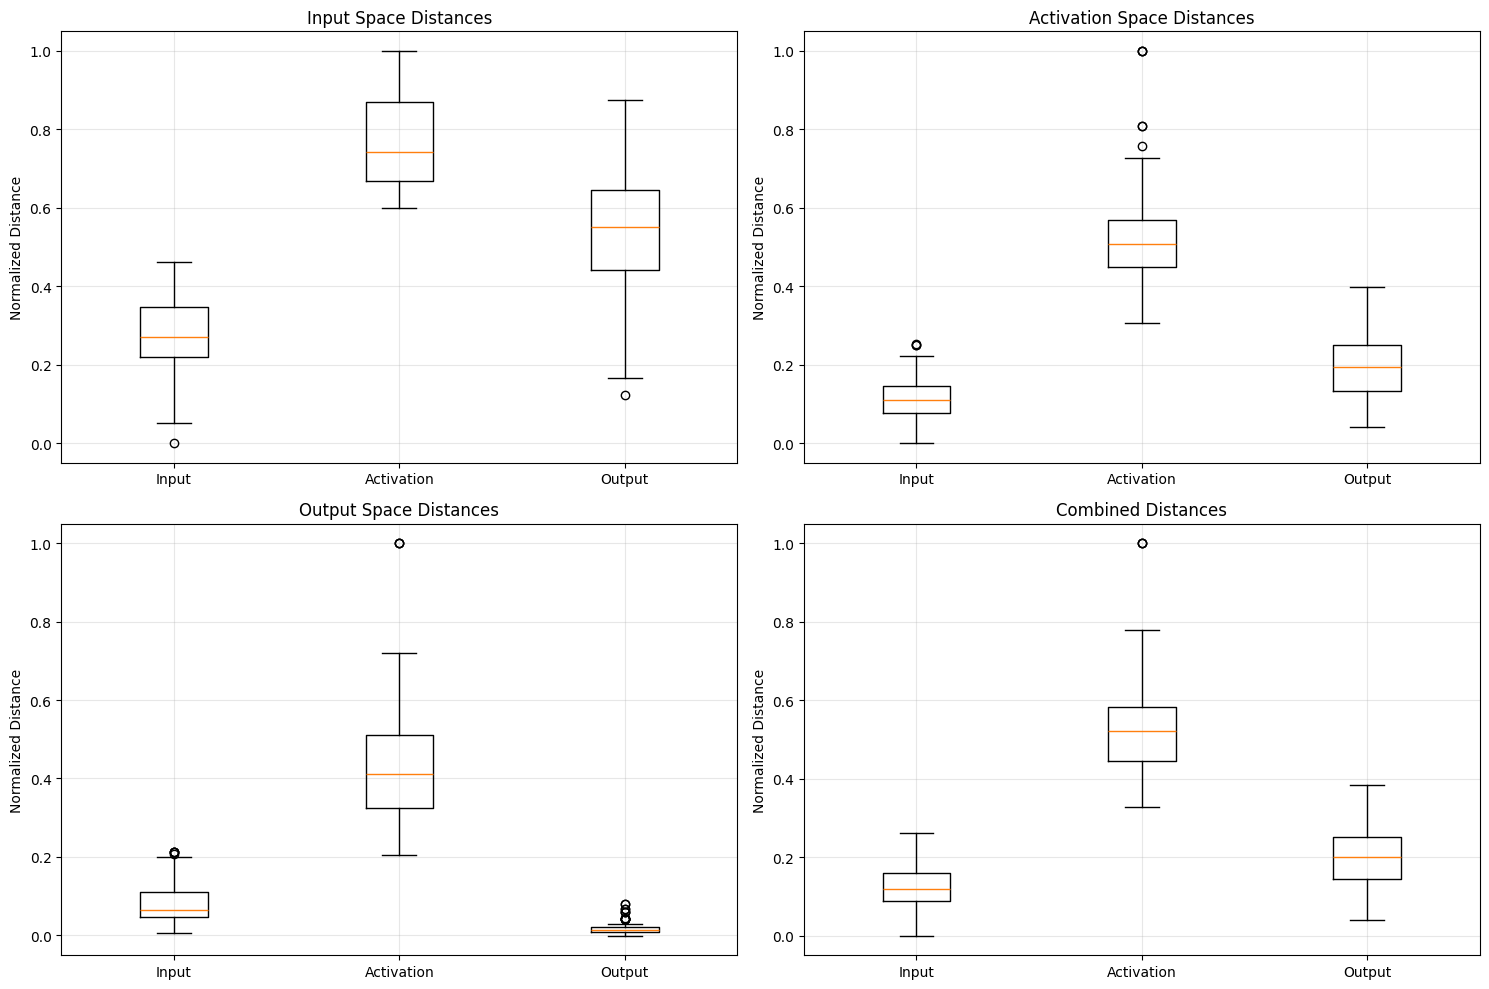


Mean distances for each approach:

input_based:
Input distance: 0.2762
Activation distance: 0.1166
Output distance: 0.0791
Combined distance: 0.1269

activation_based:
Input distance: 0.7674
Activation distance: 0.5249
Output distance: 0.4249
Combined distance: 0.5341

output_based:
Input distance: 0.5451
Activation distance: 0.1997
Output distance: 0.0163
Combined distance: 0.2025


In [14]:
# For VAE:
results_vae = analyze_multiple_samples(
    model=model,
    loader=val_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=150,
    k=15,
    device=device,
    reduced_activations=vae_reduced_activations,
    reduction_model=vae_model,
    reduction_type='vae',
    seed=42,
    activation_range=None  # Use full range for PCA
)

# Plot results
plot_distance_distributions(results_vae)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_vae[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_vae[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_vae[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_vae[approach]['combined_dist']):.4f}")

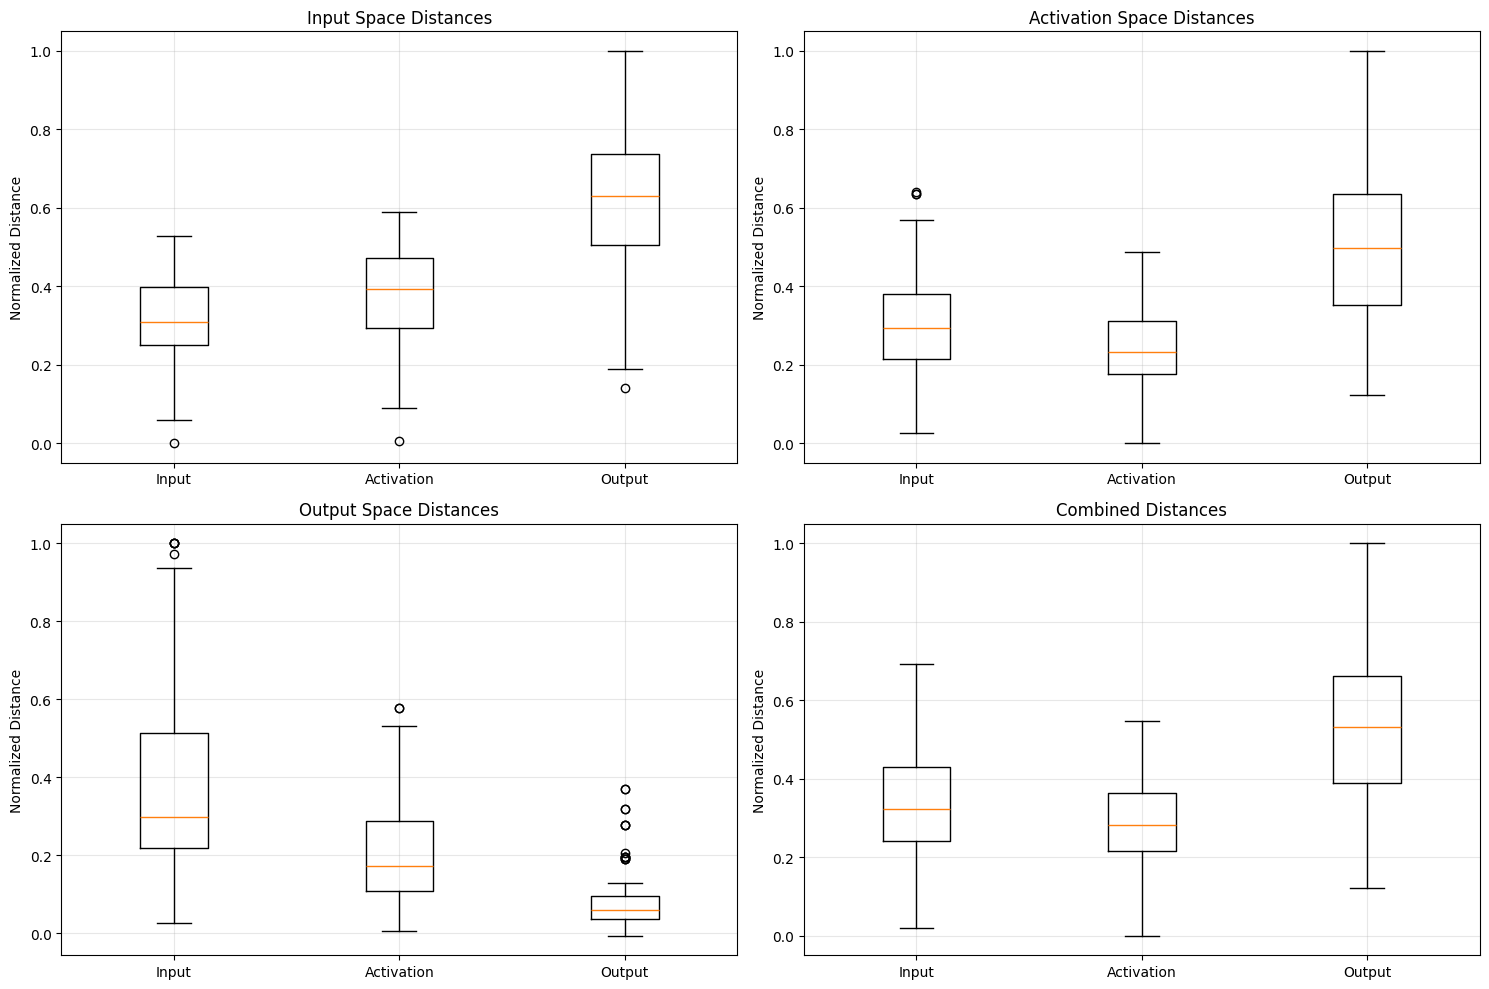


Mean distances for each approach:

input_based:
Input distance: 0.3161
Activation distance: 0.3103
Output distance: 0.3719
Combined distance: 0.3440

activation_based:
Input distance: 0.3812
Activation distance: 0.2481
Output distance: 0.2043
Combined distance: 0.2974

output_based:
Input distance: 0.6239
Activation distance: 0.5137
Output distance: 0.0766
Combined distance: 0.5377


In [15]:
# For PCA:
results_pca = analyze_multiple_samples(
    model=model,
    loader=val_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=150,
    k=15,
    device=device,
    reduced_activations=pca_reduced_activations,
    reduction_model=pca_model,
    reduction_type='pca',
    seed=42,
    activation_range=None  # Use full range for PCA
)

# Plot results
plot_distance_distributions(results_pca)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_pca[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_pca[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_pca[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_pca[approach]['combined_dist']):.4f}")

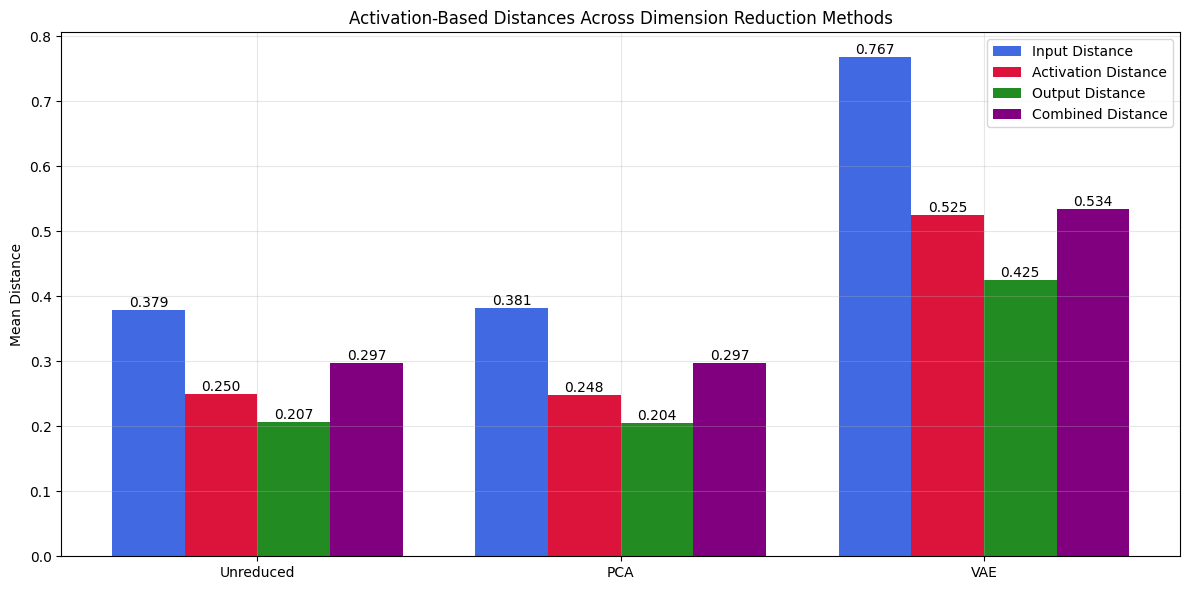


Detailed distances:

Input Distance:
Unreduced: 0.379
PCA: 0.381
VAE: 0.767

Activation Distance:
Unreduced: 0.250
PCA: 0.248
VAE: 0.525

Output Distance:
Unreduced: 0.207
PCA: 0.204
VAE: 0.425

Combined Distance:
Unreduced: 0.297
PCA: 0.297
VAE: 0.534


In [18]:
compare_reduction_distances(
    results_full=results_normal,  # Results from original dimensions
    results_pca=results_pca,         # Results after PCA reduction
    results_vae=results_vae,         # Results after VAE reduction
    normalize=False
)